<a href="https://colab.research.google.com/github/MarinaTaques/MarinaTaques/blob/main/Sa%C3%BAde_Ambiental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
casos = pd.read_csv('chagas.csv', sep= ';')

## Padronizando o dataframe - Casos de doença de Chagas em cada município entre 2010 e 2019



In [3]:
casos.columns = casos.iloc[0]
casos = casos.iloc[1:5].reset_index(drop=True)
del casos['Total']
del casos['Município']
casos.index=['Diadema', 'Nazaré Paulista', 'São Caetano do Sul', 'São Paulo']
casos.columns=[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019']]
casos

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Diadema,18.0,13.0,6.0,7.0,8.0,9,10.0,8,6,3
Nazaré Paulista,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1
São Caetano do Sul,1.0,3.0,1.0,1.0,NaN,1,3.0,2,1,2
São Paulo,300.0,302.0,287.0,294.0,278.0,272,253.0,211,199,194


## Padronizando o dataframe - População de cada município entre 2010 e 2019



In [4]:
populacao = pd.read_csv('populacao.csv', sep= ';')
del populacao['2020']
del populacao['Município']
populacao = populacao.iloc[0:4].reset_index(drop=True)
populacao.index=['Diadema', 'Nazaré Paulista', 'São Caetano do Sul', 'São Paulo']
populacao.columns=[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019']]
populacao

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Diadema,395789,398959,402160,405333,408508,411756,414891,417912,420934,423884
Nazaré Paulista,16826,17018,17211,17403,17595,17791,17980,18163,18346,18524
São Caetano do Sul,153013,153929,154853,155769,156686,157624,158530,159402,160275,161127
São Paulo,11536254,11617017,11698564,11779406,11860285,11943037,12022916,12099887,12176866,12252023


## Cálculo dos casos de doença de Chagas para cada 100.000 em cada município entre 2010 e 2019


In [5]:
# Para obtenção de casos a cada 100.000 habitantes por ano, será necessário: 
# multiplicar o valor de casos por 100.000 e dividir o valor pelo número de 
# habitantes
# Os valores faltantes foram preenchidos com taxa 0 para conseguir plotar o 
# gráfico.

casos_norm = casos.select_dtypes(include=[np.number])*100000
dados = casos_norm.div(populacao, fill_value=0 )
dados


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Diadema,4.547878,3.258480,1.491944,1.726975,1.958346,2.185760,2.410272,1.914279,1.425402,0.707741
Nazaré Paulista,0.000000,0.000000,0.000000,0.000000,0.000000,5.620820,0.000000,5.505698,5.450779,5.398402
São Caetano do Sul,0.653539,1.948950,0.645774,0.641976,0.000000,0.634421,1.892386,1.254689,0.623928,1.241257
São Paulo,2.600498,2.599635,2.453293,2.495881,2.343957,2.277478,2.104315,1.743818,1.634246,1.583412


## Plotando o gráfico

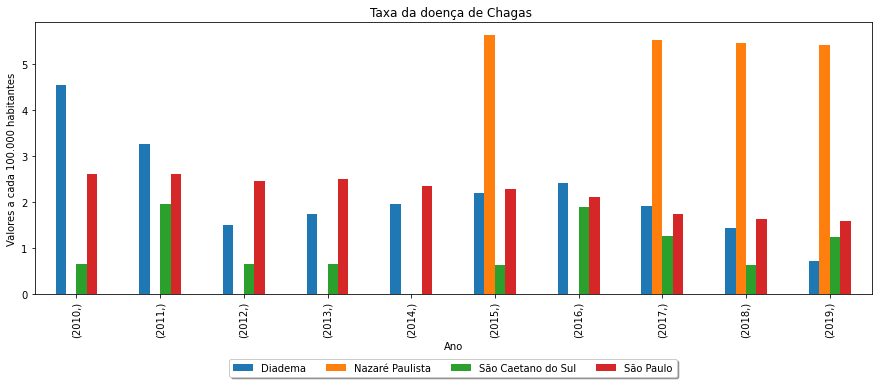

In [6]:

plt.rcParams["figure.figsize"] = (15, 5)
dados.transpose().plot(kind='bar')
plt.title("Taxa da doença de Chagas ")
plt.xlabel("Ano")
plt.ylabel("Valores a cada 100.000 habitantes")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=5)


## Salvando o dataframe em csv 

In [7]:
dados.to_csv('taxa_de_mortalidade.csv', sep = ';')

##Conclusão das análises

A doença de chagas é uma infecção parasitaria, causada pelo protozoário flagelado *Trypanosoma cruzi* e transmitida pelo bicho-barbeiro (triatomíneo). A profilaxia se baseia em controlar a presença do vetor nas moradias, evitar a degradação ambiental, e realizar investigação entomológica de insetos suspeitos de serem o barbeiro.

Aos analisarmos as cidades de Nazaré Paulista e Diadema, é possível ver que Diadema conseguiu diminuir os casos de doença de Chagas, enquanto Nazaré Paulista manteve praticamente as mesmas taxas. Ao analisarmos os aspectos ambientais e sociais, a cidade de Nazaré é um local mais rural, com moradias mais precárias sendo propícia a proliferação do barbeiro, enquanto Diadema possui uma urbanização maior que a cidade de Nazaré. Já São Paulo e São Caetano do Sul tem poucos casos variando entre 1 e 2 para cada 100 mil habitantes, são cidades que tem uma urbanização maior e assim há uma menor quantidade de matas e moradias precárias, tornando mais difícil o aumento de casos.